# Investigating a Drop in User Engagement

Step 1. Hypothesis:
1. check activities of all types of events (Table 2)
2. Less user registered (Table 1)
3. check activities of sending emails (Table 3)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Step 2: Number of weeks that weekly active users decreased (Week 31-35)

In [2]:
import datetime

In [3]:
datetime.date(2014, 7, 28).isocalendar()[1]

31

In [4]:
datetime.date(2014, 8, 4).isocalendar()[1]

32

In [5]:
datetime.date(2014, 8, 18).isocalendar()[1]

34

Step 3. Start analyzing weekly active per event of table 2

In [6]:
table2=pd.read_csv('yammer_events.csv', parse_dates=[1])

In [7]:
table2.head(n=10)

,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0
5,10522.0,2014-05-02 11:03:43,engagement,search_run,Japan,dell inspiron notebook,3.0
6,10612.0,2014-05-01 09:59:46,engagement,login,Netherlands,iphone 5,1.0
7,10612.0,2014-05-01 10:00:18,engagement,like_message,Netherlands,iphone 5,1.0
8,10612.0,2014-05-01 10:00:53,engagement,send_message,Netherlands,iphone 5,1.0
9,10612.0,2014-05-01 10:01:24,engagement,home_page,Netherlands,iphone 5,1.0


In [8]:
#convert timestamp to number of week
table2['Week']=table2['occurred_at'].apply(lambda x: "%d" % (x.week))
table2['Year']=table2['occurred_at'].apply(lambda x: "%d" % (x.year))

In [9]:
table2.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,Week,Year
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,18,2014
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0,18,2014
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0,18,2014
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0,18,2014
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0,18,2014


In [10]:
#group by year, week, and count by week
table2_yw=table2.groupby(['Year','Week']).count().reset_index()

In [11]:
table2_yw

,Year,Week,user_id,occurred_at,event_type,event_name,location,device,user_type
0,2014,18,9149,9149,9149,9149,9149,9149,8790
1,2014,19,18416,18416,18416,18416,18416,18416,17692
2,2014,20,18007,18007,18007,18007,18007,18007,17233
3,2014,21,18845,18845,18845,18845,18845,18845,18067
4,2014,22,18171,18171,18171,18171,18171,18171,17379
5,2014,23,19651,19651,19651,19651,19651,19651,18805
6,2014,24,19306,19306,19306,19306,19306,19306,18431
7,2014,25,20112,20112,20112,20112,20112,20112,19198
8,2014,26,19940,19940,19940,19940,19940,19940,19069
9,2014,27,20016,20016,20016,20016,20016,20016,19158


In [12]:
#check how many types of events in table 2
table2_ywet=table2.groupby(['Year','Week','event_type']).count().reset_index()

In [13]:
table2_ywet.tail(5)

,Year,Week,event_type,user_id,occurred_at,event_name,location,device,user_type
31,2014,33,signup_flow,1270,1270,1270,1270,1270,250
32,2014,34,engagement,16158,16158,16158,16158,16158,16158
33,2014,34,signup_flow,1290,1290,1290,1290,1290,259
34,2014,35,engagement,16166,16166,16166,16166,16166,16166
35,2014,35,signup_flow,1376,1376,1376,1376,1376,266


In [14]:
table2_engage_tail=table2_ywet.loc[table2_ywet['event_type']=='engagement'].tail(7)

In [15]:
table2_engage_tail

,Year,Week,event_type,user_id,occurred_at,event_name,location,device,user_type
22,2014,29,engagement,20723,20723,20723,20723,20723,20723
24,2014,30,engagement,20132,20132,20132,20132,20132,20132
26,2014,31,engagement,21472,21472,21472,21472,21472,21472
28,2014,32,engagement,18341,18341,18341,18341,18341,18341
30,2014,33,engagement,16612,16612,16612,16612,16612,16612
32,2014,34,engagement,16158,16158,16158,16158,16158,16158
34,2014,35,engagement,16166,16166,16166,16166,16166,16166


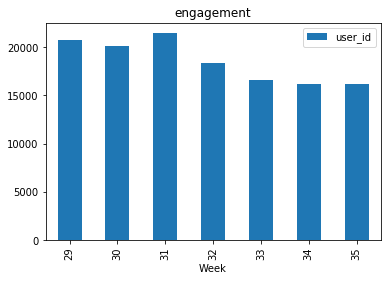

In [16]:
table2_engage_tail.plot(x='Week',y='user_id', kind='bar', title='engagement')

In [17]:
table2_signup_tail=table2_ywet.loc[table2_ywet['event_type']=='signup_flow'].tail(7)

In [18]:
table2_signup_tail

,Year,Week,event_type,user_id,occurred_at,event_name,location,device,user_type
23,2014,29,signup_flow,1130,1130,1130,1130,1130,215
25,2014,30,signup_flow,1192,1192,1192,1192,1192,228
27,2014,31,signup_flow,1228,1228,1228,1228,1228,234
29,2014,32,signup_flow,1017,1017,1017,1017,1017,189
31,2014,33,signup_flow,1270,1270,1270,1270,1270,250
33,2014,34,signup_flow,1290,1290,1290,1290,1290,259
35,2014,35,signup_flow,1376,1376,1376,1376,1376,266


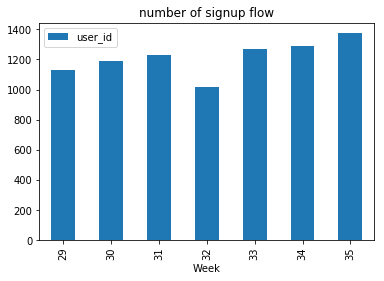

In [19]:
table2_signup_tail.plot(x='Week', y='user_id', title='number of signup flow', kind='bar')

In [20]:
table2_ywen=table2.groupby(['Year','Week','event_name']).count().reset_index()

In [21]:
table2_ywen.loc[table2_ywen['Week']=='19']

,Year,Week,event_name,user_id,occurred_at,event_type,location,device,user_type
21,2014,19,complete_signup,160,160,160,160,160,160
22,2014,19,create_user,350,350,350,350,350,0
23,2014,19,enter_email,205,205,205,205,205,0
24,2014,19,enter_info,169,169,169,169,169,0
25,2014,19,home_page,5113,5113,5113,5113,5113,5113
26,2014,19,like_message,3382,3382,3382,3382,3382,3382
27,2014,19,login,1999,1999,1999,1999,1999,1999
28,2014,19,search_autocomplete,841,841,841,841,841,841
29,2014,19,search_click_result_1,82,82,82,82,82,82
30,2014,19,search_click_result_10,26,26,26,26,26,26


In [22]:
complete_signup_tail=table2_ywen.loc[table2_ywen['event_name']=='complete_signup'].tail(7)

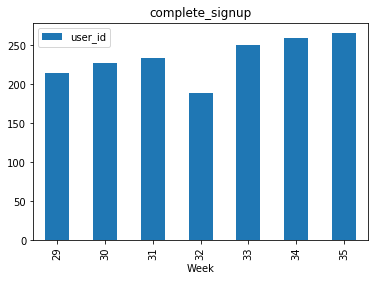

In [23]:
complete_signup_tail.plot(x='Week', y='user_id', title='complete_signup', kind='bar')

In [24]:
create_user=table2_ywen.loc[table2_ywen['event_name']=='create_user'].tail(7)

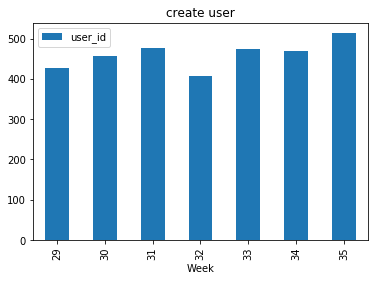

In [25]:
create_user.plot(x='Week', y='user_id', kind='bar', title='create user')

In [26]:
enter_email_tail=table2_ywen.loc[table2_ywen['event_name']=='enter_email'].tail(7)

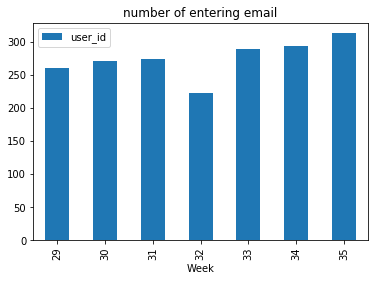

In [27]:
enter_email_tail.plot(x='Week', y='user_id', kind='bar',title='number of entering email')

In [28]:
enter_info_tail=table2_ywen.loc[table2_ywen['event_name']=='enter_info'].tail(7)

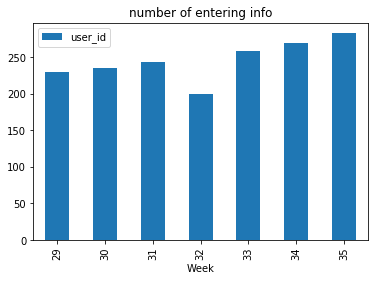

In [29]:
enter_info_tail.plot(x='Week',y='user_id', title='number of entering info', kind='bar')

In [30]:
home_page_tail=table2_ywen.loc[table2_ywen['event_name']=='home_page'].tail(n=7)

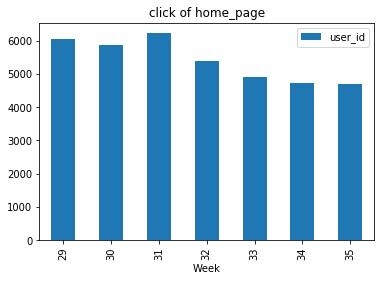

In [31]:
home_page_tail.plot(x='Week',y='user_id',title='click of home_page',kind='bar')

In [32]:
like_msg_tail=table2_ywen.loc[table2_ywen['event_name']=='like_message'].tail(n=7)

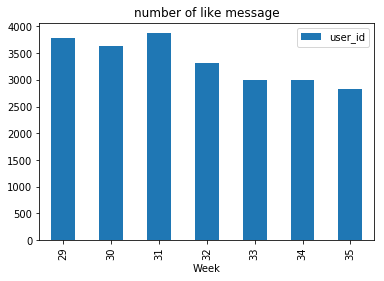

In [33]:
like_msg_tail.plot(x='Week', y='user_id', title='number of like message', kind='bar')

In [34]:
login_tail=table2_ywen.loc[table2_ywen['event_name']=='login'].tail(n=7)

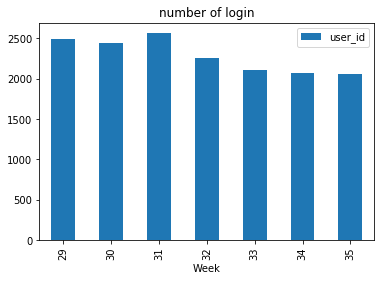

In [35]:
login_tail.plot(x='Week',y='user_id', title='number of login', kind='bar')

In [36]:
search_autocomplete_tail=table2_ywen.loc[table2_ywen['event_name']=='search_autocomplete'].tail(n=7)

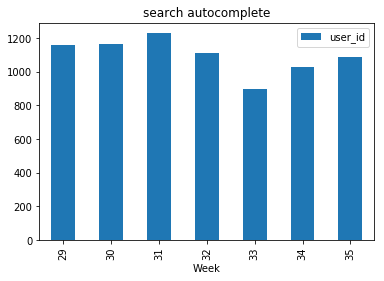

In [37]:
search_autocomplete_tail.plot(x='Week',y='user_id',title='search autocomplete',kind='bar')

In [38]:
table2_ywen.loc[table2_ywen['event_name']=='search_click_result_1'].tail(n=7)

,Year,Week,event_name,user_id,occurred_at,event_type,location,device,user_type
239,2014,29,search_click_result_1,94,94,94,94,94,94
260,2014,30,search_click_result_1,92,92,92,92,92,92
281,2014,31,search_click_result_1,96,96,96,96,96,96
302,2014,32,search_click_result_1,74,74,74,74,74,74
323,2014,33,search_click_result_1,69,69,69,69,69,69
344,2014,34,search_click_result_1,40,40,40,40,40,40
365,2014,35,search_click_result_1,66,66,66,66,66,66


In [39]:
table2_ywen.loc[table2_ywen['event_name']=='search_click_result_2'].tail(n=7)

,Year,Week,event_name,user_id,occurred_at,event_type,location,device,user_type
241,2014,29,search_click_result_2,114,114,114,114,114,114
262,2014,30,search_click_result_2,83,83,83,83,83,83
283,2014,31,search_click_result_2,91,91,91,91,91,91
304,2014,32,search_click_result_2,87,87,87,87,87,87
325,2014,33,search_click_result_2,67,67,67,67,67,67
346,2014,34,search_click_result_2,60,60,60,60,60,60
367,2014,35,search_click_result_2,56,56,56,56,56,56


In [40]:
table2_ywen.loc[table2_ywen['event_name']=='search_click_result_3'].tail(n=7)

,Year,Week,event_name,user_id,occurred_at,event_type,location,device,user_type
242,2014,29,search_click_result_3,62,62,62,62,62,62
263,2014,30,search_click_result_3,67,67,67,67,67,67
284,2014,31,search_click_result_3,82,82,82,82,82,82
305,2014,32,search_click_result_3,55,55,55,55,55,55
326,2014,33,search_click_result_3,58,58,58,58,58,58
347,2014,34,search_click_result_3,39,39,39,39,39,39
368,2014,35,search_click_result_3,51,51,51,51,51,51


In [41]:
table2_ywen.loc[table2_ywen['event_name']=='search_click_result_4'].tail(n=7)

,Year,Week,event_name,user_id,occurred_at,event_type,location,device,user_type
243,2014,29,search_click_result_4,74,74,74,74,74,74
264,2014,30,search_click_result_4,84,84,84,84,84,84
285,2014,31,search_click_result_4,75,75,75,75,75,75
306,2014,32,search_click_result_4,73,73,73,73,73,73
327,2014,33,search_click_result_4,55,55,55,55,55,55
348,2014,34,search_click_result_4,50,50,50,50,50,50
369,2014,35,search_click_result_4,55,55,55,55,55,55


In [42]:
table2_ywen.loc[table2_ywen['event_name']=='search_click_result_5'].tail(n=7)

,Year,Week,event_name,user_id,occurred_at,event_type,location,device,user_type
244,2014,29,search_click_result_5,48,48,48,48,48,48
265,2014,30,search_click_result_5,65,65,65,65,65,65
286,2014,31,search_click_result_5,56,56,56,56,56,56
307,2014,32,search_click_result_5,53,53,53,53,53,53
328,2014,33,search_click_result_5,41,41,41,41,41,41
349,2014,34,search_click_result_5,36,36,36,36,36,36
370,2014,35,search_click_result_5,35,35,35,35,35,35


In [43]:
table2_ywen.loc[table2_ywen['event_name']=='search_click_result_6'].tail(n=7)

,Year,Week,event_name,user_id,occurred_at,event_type,location,device,user_type
245,2014,29,search_click_result_6,52,52,52,52,52,52
266,2014,30,search_click_result_6,52,52,52,52,52,52
287,2014,31,search_click_result_6,60,60,60,60,60,60
308,2014,32,search_click_result_6,38,38,38,38,38,38
329,2014,33,search_click_result_6,50,50,50,50,50,50
350,2014,34,search_click_result_6,33,33,33,33,33,33
371,2014,35,search_click_result_6,33,33,33,33,33,33


In [44]:
table2_ywen.loc[table2_ywen['event_name']=='search_click_result_7'].tail(n=7)

,Year,Week,event_name,user_id,occurred_at,event_type,location,device,user_type
246,2014,29,search_click_result_7,36,36,36,36,36,36
267,2014,30,search_click_result_7,40,40,40,40,40,40
288,2014,31,search_click_result_7,50,50,50,50,50,50
309,2014,32,search_click_result_7,47,47,47,47,47,47
330,2014,33,search_click_result_7,32,32,32,32,32,32
351,2014,34,search_click_result_7,30,30,30,30,30,30
372,2014,35,search_click_result_7,27,27,27,27,27,27


In [45]:
table2_ywen.loc[table2_ywen['event_name']=='search_click_result_8'].tail(n=7)

,Year,Week,event_name,user_id,occurred_at,event_type,location,device,user_type
247,2014,29,search_click_result_8,50,50,50,50,50,50
268,2014,30,search_click_result_8,42,42,42,42,42,42
289,2014,31,search_click_result_8,40,40,40,40,40,40
310,2014,32,search_click_result_8,43,43,43,43,43,43
331,2014,33,search_click_result_8,26,26,26,26,26,26
352,2014,34,search_click_result_8,24,24,24,24,24,24
373,2014,35,search_click_result_8,28,28,28,28,28,28


In [46]:
table2_ywen.loc[table2_ywen['event_name']=='search_click_result_9'].tail(n=7)

,Year,Week,event_name,user_id,occurred_at,event_type,location,device,user_type
248,2014,29,search_click_result_9,52,52,52,52,52,52
269,2014,30,search_click_result_9,47,47,47,47,47,47
290,2014,31,search_click_result_9,54,54,54,54,54,54
311,2014,32,search_click_result_9,48,48,48,48,48,48
332,2014,33,search_click_result_9,29,29,29,29,29,29
353,2014,34,search_click_result_9,19,19,19,19,19,19
374,2014,35,search_click_result_9,29,29,29,29,29,29


In [47]:
table2_ywen.loc[table2_ywen['event_name']=='search_click_result_10'].tail(n=7)

,Year,Week,event_name,user_id,occurred_at,event_type,location,device,user_type
240,2014,29,search_click_result_10,35,35,35,35,35,35
261,2014,30,search_click_result_10,30,30,30,30,30,30
282,2014,31,search_click_result_10,46,46,46,46,46,46
303,2014,32,search_click_result_10,27,27,27,27,27,27
324,2014,33,search_click_result_10,34,34,34,34,34,34
345,2014,34,search_click_result_10,12,12,12,12,12,12
366,2014,35,search_click_result_10,23,23,23,23,23,23


In [48]:
search_run_tail=table2_ywen.loc[table2_ywen['event_name']=='search_run'].tail(n=7)

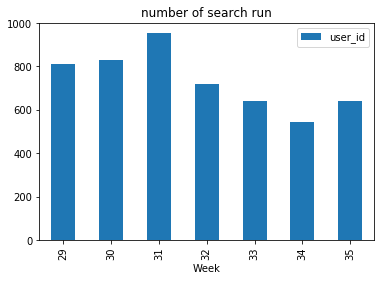

In [49]:
search_run_tail.plot(x='Week', y='user_id', title='number of search run', kind='bar')

In [50]:
send_msg_tail=table2_ywen.loc[table2_ywen['event_name']=='send_message'].tail(n=7)

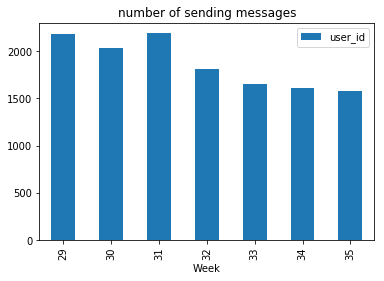

In [51]:
send_msg_tail.plot(x='Week', y='user_id', title='number of sending messages', kind='bar')

In [52]:
view_inbox_tail=table2_ywen.loc[table2_ywen['event_name']=='view_inbox'].tail(n=7)

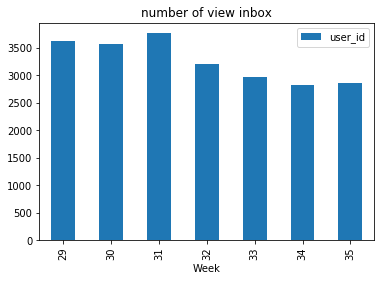

In [53]:
view_inbox_tail.plot(x='Week',y='user_id',title='number of view inbox',kind='bar')

Conclusion:  
Among the 12 types of events, the decrease in activities of the following contribute to the overall weekly activity decrease:
1. User loads the home page, 
2. User likes another user’s messages,  
3. User logs into Yamme,  
4. User runs a search query and is taken to the search results page, 
5. User posts a message,
6. User views messages in the inbox
What are the explanation and how to improve the product:
1. They don't find Yamme is that helpful;
2. Yamme needs to improve their search engine;
3. Yamme needs to change webdesign to make user more comfortable explore inbox, send messages etc. 

Can ignore: Analysis on Table 1 and Table 3, results are not significant related to engagement decreasing.

In [54]:
table1=pd.read_csv('yammer_users.csv',parse_dates= [1]) #parse_dates

In [55]:
table1.head()

,user_id,created_at,company_id,language,activated_at,state
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active
1,1.0,2013-01-01 13:07:46,28.0,english,NaN,pending
2,2.0,2013-01-01 10:59:05,51.0,english,NaN,pending
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active


In [56]:
#df['week_number_of_year'] = df['date_given'].dt.week
table1['Week'] = table1['created_at'].apply(lambda x: "%d" % (x.week))

In [57]:
table1['Year'] = table1['created_at'].apply(lambda x: "%d" % (x.year))

In [58]:
#table1.drop(columns=['year-week'], axis=1, inplace=True)

In [59]:
table1.head()

,user_id,created_at,company_id,language,activated_at,state,Week,Year
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active,1,2013
1,1.0,2013-01-01 13:07:46,28.0,english,NaN,pending,1,2013
2,2.0,2013-01-01 10:59:05,51.0,english,NaN,pending,1,2013
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active,1,2013
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,1,2013


In [60]:
table1_count=table1.groupby(['Year','Week']).count().reset_index() #if not reset_index, 'Year', 'Week' will be index

In [61]:
table1_count.Week=pd.to_numeric(table1_count.Week) #if not, values type in 'Week' are str
table1_count.Year=pd.to_numeric(table1_count.Year)

In [62]:
table1_sort=table1_count.sort_values(by=['Year','Week'])

In [63]:
table1_sort.tail(n=30)

,Year,Week,user_id,created_at,company_id,language,activated_at,state
83,2014,6,257,257,257,257,132,257
84,2014,7,262,262,262,262,135,262
85,2014,8,272,272,272,272,127,272
86,2014,9,268,268,268,268,127,268
53,2014,10,272,272,272,272,135,272
54,2014,11,288,288,288,288,152,288
55,2014,12,286,286,286,286,132,286
56,2014,13,300,300,300,300,151,300
57,2014,14,306,306,306,306,161,306
58,2014,15,319,319,319,319,166,319


In [64]:
new_users=table1_sort['created_at'].values

In [65]:
import datetime

In [66]:
datetime.date(2014, 7, 28).isocalendar()[1]

31

In [67]:
datetime.date(2014, 8, 4).isocalendar()[1]

32

In [68]:
datetime.date(2014, 8, 18).isocalendar()[1]

34

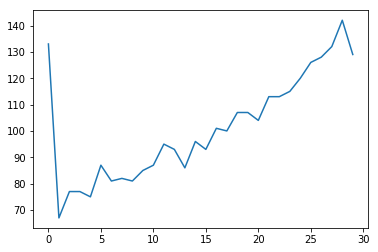

In [69]:
plt.plot(new_users[:30])

In [70]:
table1_sort.tail(n=6)

,Year,Week,user_id,created_at,company_id,language,activated_at,state
75,2014,30,458,458,458,458,228,458
76,2014,31,476,476,476,476,234,476
77,2014,32,406,406,406,406,189,406
78,2014,33,473,473,473,473,250,473
79,2014,34,468,468,468,468,259,468
80,2014,35,514,514,514,514,266,514


Decrease of active engagement is because of less new users

In [71]:
table3=pd.read_csv('yammer_emails.csv', parse_dates=[1])

In [72]:
table3.head(n=10)

,user_id,occurred_at,action,user_type
0,0.0,2014-05-06 09:30:00,sent_weekly_digest,1.0
1,0.0,2014-05-13 09:30:00,sent_weekly_digest,1.0
2,0.0,2014-05-20 09:30:00,sent_weekly_digest,1.0
3,0.0,2014-05-27 09:30:00,sent_weekly_digest,1.0
4,0.0,2014-06-03 09:30:00,sent_weekly_digest,1.0
5,0.0,2014-06-03 09:30:25,email_open,1.0
6,0.0,2014-06-10 09:30:00,sent_weekly_digest,1.0
7,0.0,2014-06-10 09:30:24,email_open,1.0
8,0.0,2014-06-17 09:30:00,sent_weekly_digest,1.0
9,0.0,2014-06-17 09:30:23,email_open,1.0


In [73]:
table3['week']=table3['occurred_at'].apply(lambda x: "%d" % (x.week))

In [74]:
table3['year']=table3['occurred_at'].apply(lambda x: "%d" % (x.year))

In [75]:
table3_count=table3.groupby(['year','week']).count().reset_index()

In [76]:
table3_count

,year,week,user_id,occurred_at,action,user_type
0,2014,18,1525,1525,1525,1525
1,2014,19,4119,4119,4119,4119
2,2014,20,4290,4290,4290,4290
3,2014,21,4405,4405,4405,4405
4,2014,22,4480,4480,4480,4480
5,2014,23,4595,4595,4595,4595
6,2014,24,4796,4796,4796,4796
7,2014,25,5063,5063,5063,5063
8,2014,26,5008,5008,5008,5008
9,2014,27,5251,5251,5251,5251


Decrease of active engagement is because of less emails communications

In [77]:
table4=pd.read_csv('dimension_rollup_periods.csv')

In [78]:
table4.tail()

,period_id,time_id,pst_start,pst_end,utc_start,utc_end
55997,2007.0,2015-12-31 19:00:00,2015-12-24 19:00:00,2015-12-31 19:00:00,2015-12-25 03:00:00,2016-01-01 03:00:00
55998,2007.0,2015-12-31 20:00:00,2015-12-24 20:00:00,2015-12-31 20:00:00,2015-12-25 04:00:00,2016-01-01 04:00:00
55999,2007.0,2015-12-31 21:00:00,2015-12-24 21:00:00,2015-12-31 21:00:00,2015-12-25 05:00:00,2016-01-01 05:00:00
56000,2007.0,2015-12-31 22:00:00,2015-12-24 22:00:00,2015-12-31 22:00:00,2015-12-25 06:00:00,2016-01-01 06:00:00
56001,2007.0,2015-12-31 23:00:00,2015-12-24 23:00:00,2015-12-31 23:00:00,2015-12-25 07:00:00,2016-01-01 07:00:00
